In [170]:
#using cleaned-HIV
#import modules
!pip install kneed
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
from kneed import KneeLocator
import seaborn as sns
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
# Load the data
df = pd.read_csv("FinalResult.csv", index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 825
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          825 non-null    object 
 1   Period            825 non-null    int64  
 2   ART (%)           825 non-null    int64  
 3   ART coverage      825 non-null    float64
 4   Death (%)         825 non-null    float64
 5   Death by HIV      825 non-null    int64  
 6   Alive (%)         825 non-null    float64
 7   Alive with HIV    825 non-null    int64  
 8   People with HIV   825 non-null    int64  
 9   Total Population  825 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 70.9+ KB


In [172]:
#Setting data
data = df.iloc[750:,[2,4,6,8,9]]
data.head()

,ART (%),Death (%),Alive (%),People with HIV,Total Population
751,41,3.484848,96.515152,66000,1449891
752,65,1.538462,98.461538,13000,9749625
753,41,4.687500,95.312500,320000,33933611
754,61,3.947368,96.052632,76000,8141343
755,39,1.282051,98.717949,7800,1883162


In [173]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(data)
scaled_data = scalar.transform(data)

In [174]:
# Importing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

In [175]:
pca.explained_variance_ratio_

array([4.73706170e-01, 2.57226566e-01, 1.82956690e-01, 8.61105737e-02,
       1.51170383e-30])

Text(0, 0.5, 'Cumulative Explained Variance')

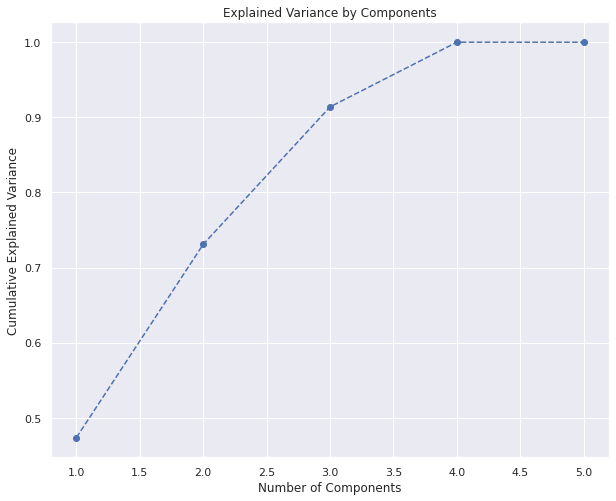

In [176]:
plt.figure(figsize=(10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(),marker='o',linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [177]:
pca = PCA(n_components = 3)

pca.fit(scaled_data)

PCA(n_components=3)

In [178]:
pca.transform(scaled_data)
scores_pca = pca.transform(scaled_data)

In [179]:
wcss = []
for i in range (1,21):
  kmeans_pca = KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)


Text(0, 0.5, 'K-Means with PCA Clustering')

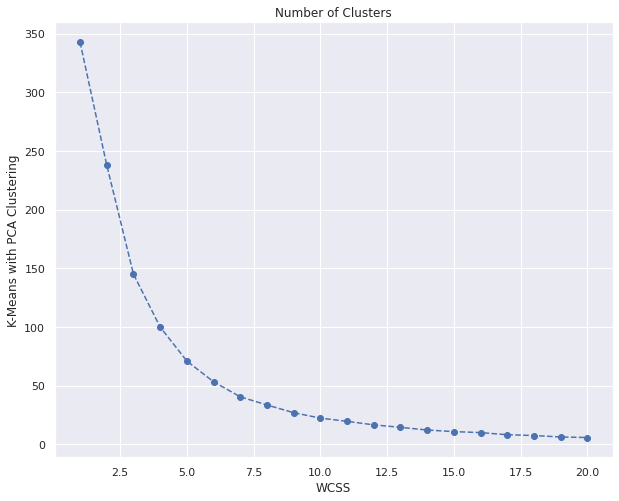

In [180]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss,marker='o',linestyle = '--')
plt.title("Number of Clusters")
plt.xlabel('WCSS')
plt.ylabel('K-Means with PCA Clustering')

In [221]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [222]:
kmeans_pca.fit(scores_pca)


KMeans(n_clusters=4, random_state=42)

In [223]:
df_pcakmeans = pd.concat([data.reset_index(drop= True),pd.DataFrame(scores_pca)],axis = 1)
df_pcakmeans.columns.values[-3:]= ['Component 1','Component 2','Component 3']
df_pcakmeans['Segment K-Means PCA'] = kmeans_pca.labels_
df_pcakmeans.head()



,ART (%),Death (%),Alive (%),People with HIV,Total Population,Component 1,Component 2,Component 3,Segment K-Means PCA
0,41,3.484848,96.515152,66000,1449891,0.530959,-0.827960,0.873304,1
1,65,1.538462,98.461538,13000,9749625,-0.258708,-0.761971,0.040637,0
2,41,4.687500,95.312500,320000,33933611,0.169661,0.334213,1.312961,1
3,61,3.947368,96.052632,76000,8141343,0.176933,-0.443911,0.082618,0
4,39,1.282051,98.717949,7800,1883162,0.245067,-1.193694,1.067579,1


In [224]:
df_pcakmeans['Segment'] = df_pcakmeans['Segment K-Means PCA'].map({0:'first',
                                                                   1:'second',
                                                                    2:'third',
                                                                   3:'fourth'
 } )
#
#                                                                    
#                                                                    4:'fifth'}

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


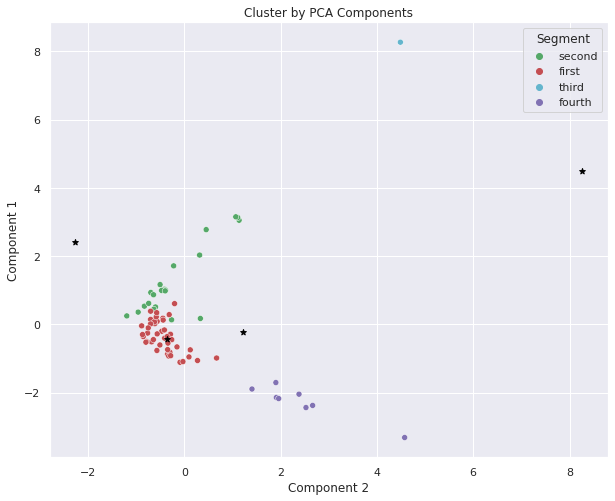

In [225]:
x_axis= df_pcakmeans['Component 2']
y_axis = df_pcakmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_pcakmeans['Segment'], palette
                =['g','r','c','m'])
# ,'b'
plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1],c='black'
, marker="*", label = 'centroid')
plt.title('Cluster by PCA Components')
plt.show()


In [226]:
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier
import pandas as pd

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [227]:
cluster_report(df_pcakmeans.iloc[:,:7], df_pcakmeans['Segment'], 
               min_samples_leaf=20, pruning_level = 0.05)

,class_name,instance_count,rule_list
0,first,45,[1.0] (ART (%) > 59.0) and (Component 2 <= -0.28994403779506683)[0.5] (ART (%) > 59.0) and (Component 2 > -0.28994403779506683)
2,fourth,8,NaN
1,second,21,[0.8695652173913043] (ART (%) <= 59.0)
3,third,1,NaN


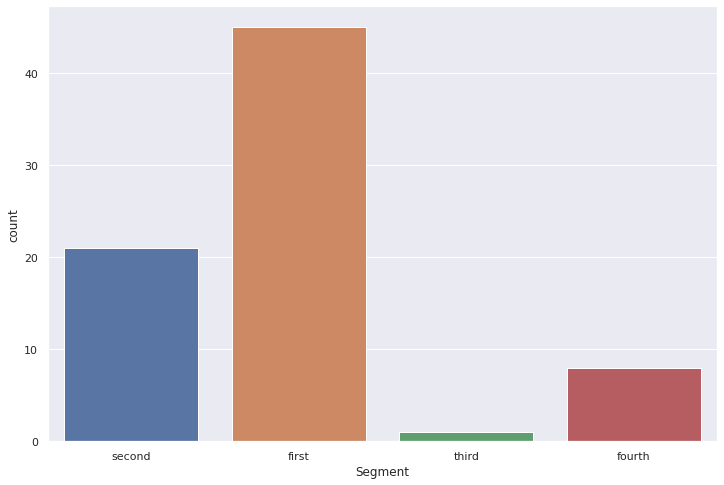

In [228]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Segment', data=df_pcakmeans)
plt.show()

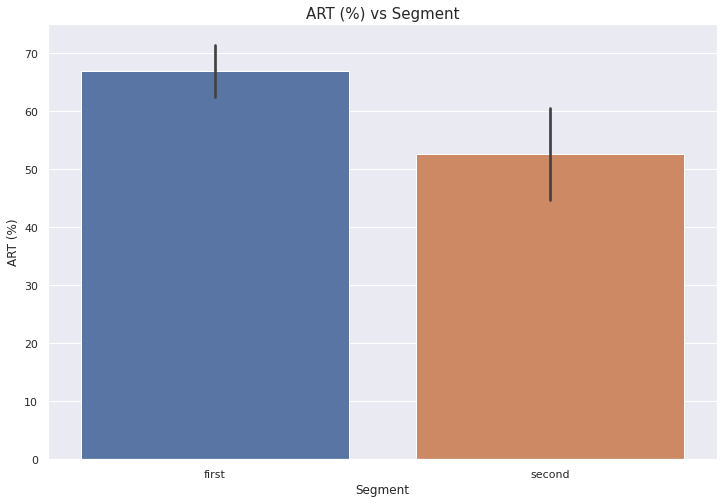

In [188]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_pcakmeans["Segment"], y=df_pcakmeans["ART (%)"])
plt.title("ART (%) vs Segment", size=15)
plt.show()

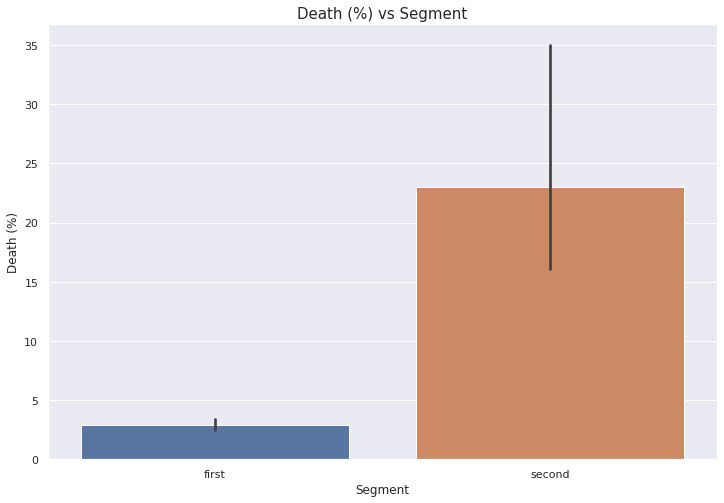

In [189]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_pcakmeans["Segment"], y=df_pcakmeans["Death (%)"])
plt.title("Death (%) vs Segment", size=15)
plt.show()

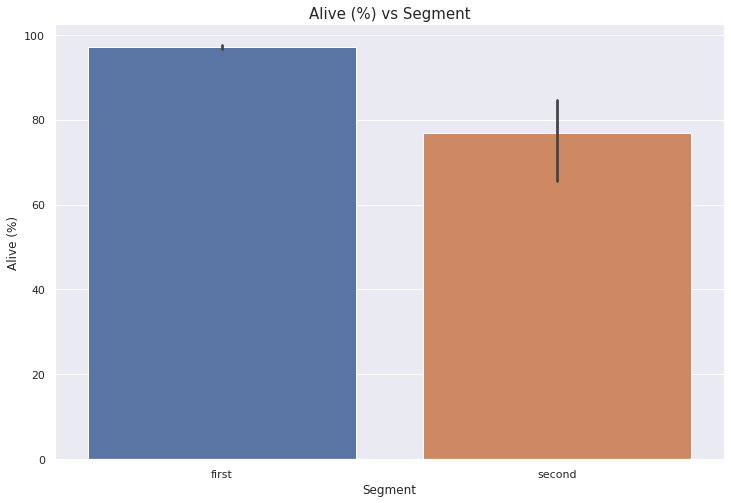

In [190]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_pcakmeans["Segment"], y=df_pcakmeans["Alive (%)"])
plt.title("Alive (%) vs Segment", size=15)
plt.show()

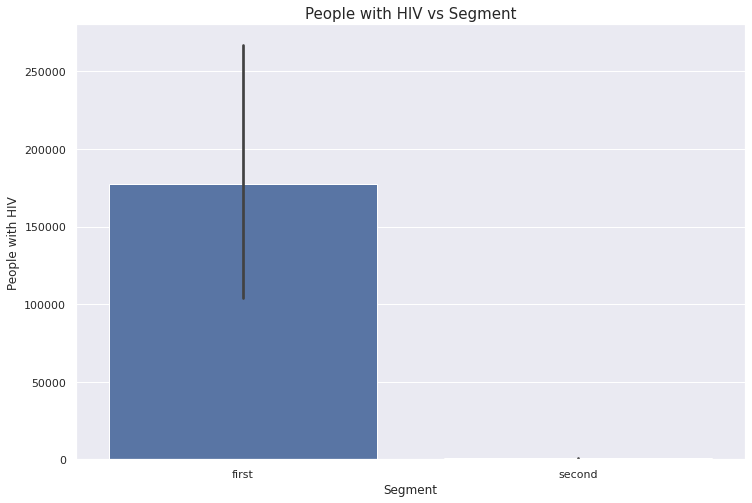

In [191]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_pcakmeans["Segment"], y=df_pcakmeans["People with HIV"])
plt.title("People with HIV vs Segment", size=15)
plt.show()

In [192]:
# plt.figure(figsize=(12, 8))
# sns.barplot(x=df_pcakmeans["Death (%)"], y=df_pcakmeans["People with HIV"])
# plt.title("People with HIV vs Segment", size=15)
# plt.show()